In [1]:
# save log_seed
import pickle
# write to Pickle
#pickle.dump(log_seed, open( "pool_based_tuning/100iters_10inits_100trials_linEmission_PI_init_included.pkl", "wb" ) )


In [47]:
# data for max_uv vs iteration plot
import pickle
import matplotlib.pyplot as plt
from botorch.acquisition import UpperConfidenceBound
import argparse
from datetime import datetime
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import time
import torch
import uuid

plt.rcParams["font.family"] = "arial"

def get_max_stat(log_seed):
    max_uv_all = []
    for i in range(len(log_seed)):
        df = pd.DataFrame((log_seed[i]))
        df.columns =['yb_1', 'er_1', 'yb_2', 'er_2','radius','UV']
        evalued = len(df)
        max_uv = []
        y = df.UV
        for i in range(evalued):
            max_uv.append(df.iloc[0:i+1].UV.max())

        max_uv_all.append(max_uv)
    y = np.mean(max_uv_all,axis=0)
    std = np.std(max_uv_all,axis=0)
    stderr = std/np.sqrt(len(max_uv_all))
    x = range(len(max_uv))
    return x,y,stderr

# data for count of top uv vs iteration plot
def get_top_stat(log_seed):
    top_count_all = []
    for i in range(len(log_seed)):
        df = pd.DataFrame((log_seed[i]))
        df.columns =['yb_1', 'er_1', 'yb_2', 'er_2','radius','UV']
        evalued = len(df)
        top_count = []
        y = df.UV
        for i in range(evalued):
            df_i = df.iloc[0:i+1]
            top_count.append(len(df_i[df_i['UV']>=3893])/34*100)
        top_count_all.append(top_count)

    y = np.mean(top_count_all,axis=0)
    std = np.std(top_count_all,axis=0)
    stderr = std/np.sqrt(len(top_count_all))
    x = range(len(top_count))
    return x, y, stderr

# main manuscript

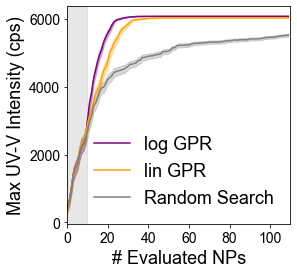

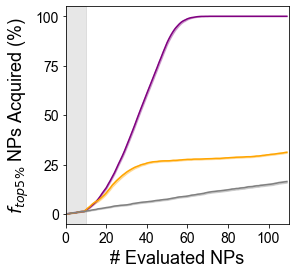

In [31]:
df0 = pickle.load( open( "../saved_data/new_100iters_10inits_100trials_logEmission_UCB_beta=5_init_included.pkl", "rb" ) )
df1 = pickle.load( open( "../saved_data/new_100iters_10inits_100trials_linEmission_UCB_beta=5000_init_included.pkl", "rb" ) )
df2 = pickle.load( open( "../saved_data/new_100iters_10inits_100trials_logEmission_RS_init_included.pkl", "rb" ) )

FontSize = 18
ticksize = 14

fig, ax1 = plt.subplots(figsize=(4,4))

x,y,stderr = get_max_stat(df0)
plt.plot(x,y,c='purple',label='log GPR')
plt.fill_between(x, y-stderr, y+stderr, color='purple',alpha=0.3)

x,y,stderr = get_max_stat(df1)
plt.plot(x,y,c='orange',label='lin GPR')
plt.fill_between(x, y-stderr, y+stderr, color='orange',alpha=0.3)

x,y,stderr = get_max_stat(df2)
plt.plot(x,y,c='grey',label='Random Search')
plt.fill_between(x, y-stderr, y+stderr, color='grey',alpha=0.3)




plt.xlim([0,110])
plt.axvspan(0, 10, color='grey', alpha=0.19)
plt.xlabel('# Evaluated NPs', fontsize = FontSize)
plt.ylabel('Max UV-V Intensity (cps)', fontsize = FontSize)
plt.legend(loc='lower right', fontsize = FontSize,frameon=False)
plt.locator_params(axis='y', nbins=4)
plt.xticks(fontsize=ticksize)
plt.yticks(fontsize=ticksize)
#plt.savefig('pool_max_uv_new_square.pdf', bbox_inches = 'tight') 



#####
fig, ax1 = plt.subplots(figsize=(4,4))

x,y,stderr = get_top_stat(df0)
plt.plot(x,y,c='purple',label='log GPR')
plt.fill_between(x, y-stderr, y+stderr, color='purple',alpha=0.3)

x,y,stderr = get_top_stat(df1)
plt.plot(x,y,c='orange',label='lin GPR')
plt.fill_between(x, y-stderr, y+stderr, color='orange',alpha=0.3)

x,y,stderr = get_top_stat(df2)
plt.plot(x,y,c='grey',label='Random Search')
plt.fill_between(x, y-stderr, y+stderr, color='grey',alpha=0.3)

plt.xlim([0,110])
plt.axvspan(0, 10, color='grey', alpha=0.19)
plt.xlabel('# Evaluated NPs', fontsize = FontSize)
plt.ylabel('$f_{top5\%}$ NPs Acquired (%)', fontsize = FontSize)
#plt.legend(loc='lower right', fontsize = FontSize,frameon=False)
plt.locator_params(axis='y', nbins=5)
plt.xticks(fontsize=ticksize)
plt.yticks(fontsize=ticksize)
plt.savefig('pool_top_number_new_square.pdf',bbox_inches = 'tight') 

In [6]:
step = np.where(y >= 9049.999376*0.95)
step

(array([ 23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,
         36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,
         49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,
         62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,
         75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,
         88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100,
        101, 102, 103, 104, 105, 106, 107, 108, 109]),)

In [7]:
x,y,stderr = get_max_stat(df1)
step = np.where(y >= 9049.999376*0.95)
step

(array([ 31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,
         44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,
         57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,
         70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,
         83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,
         96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108,
        109]),)

In [44]:
x,y,stderr = get_top_stat(df0)
i=60
print(x[i])
print(y[i])
print(stderr[i])

60
33.56
0.12986146464598355


In [45]:
x,y,stderr = get_top_stat(df1)
print(y[i])
print(stderr[i])

9.39
0.10853110153315508


In [53]:
x,y,stderr = get_top_stat(df0)
i=60
print(x[i])
print(y[i])
print(stderr[i])

60
98.70588235294117
0.38194548425289276


In [54]:
x,y,stderr = get_top_stat(df1)
print(x[i])
print(y[i])
print(stderr[i])

60
27.61764705882354
0.3192091221563382


# SI log UV

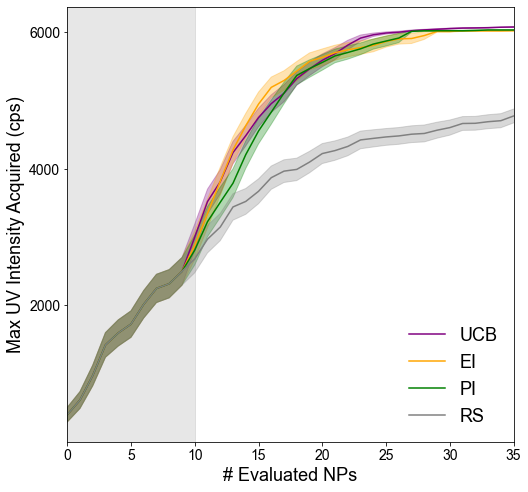

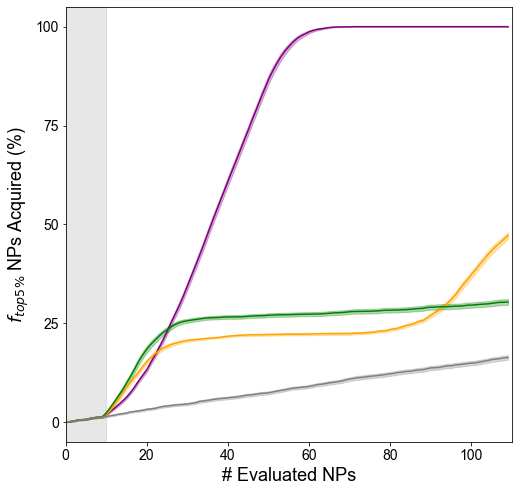

In [57]:
df0 = pickle.load( open( "../saved_data/new_100iters_10inits_100trials_logEmission_UCB_beta=5_init_included.pkl", "rb" ) )
df1 = pickle.load( open( "../saved_data/new_100iters_10inits_100trials_linEmission_UCB_beta=5000_init_included.pkl", "rb" ) )
df2 = pickle.load( open( "../saved_data/new_100iters_10inits_100trials_logEmission_RS_init_included.pkl", "rb" ) )
df3 = pickle.load( open( "../saved_data/new_100iters_10inits_100trials_logEmission_EI_init_included.pkl", "rb" ) )
df4 = pickle.load( open( "../saved_data/new_100iters_10inits_100trials_logEmission_PI_init_included.pkl", "rb" ) )

FontSize = 18
ticksize = 14

fig, ax1 = plt.subplots(figsize=(8,8))

x,y,stderr = get_max_stat(df0)
plt.plot(x,y,c='purple',label='UCB')
plt.fill_between(x, y-stderr, y+stderr, color='purple',alpha=0.3)

x,y,stderr = get_max_stat(df3)
plt.plot(x,y,c='orange',label='EI')
plt.fill_between(x, y-stderr, y+stderr, color='orange',alpha=0.3)

x,y,stderr = get_max_stat(df4)
plt.plot(x,y,c='green',label='PI')
plt.fill_between(x, y-stderr, y+stderr, color='green',alpha=0.3)

x,y,stderr = get_max_stat(df2)
plt.plot(x,y,c='grey',label='RS')
plt.fill_between(x, y-stderr, y+stderr, color='grey',alpha=0.3)




plt.xlim([0,35])
plt.axvspan(0, 10, color='grey', alpha=0.19)
plt.xlabel('# Evaluated NPs', fontsize = FontSize)
plt.ylabel('Max UV Intensity Acquired (cps)', fontsize = FontSize)
plt.legend(loc='lower right', fontsize = FontSize,frameon=False)
plt.locator_params(axis='y', nbins=4)
plt.xticks(fontsize=ticksize)
plt.yticks(fontsize=ticksize)
plt.savefig('SI_pool_max_uv_log_var_AF.pdf', bbox_inches = 'tight') 



#####
fig, ax1 = plt.subplots(figsize=(8,8))

x,y,stderr = get_top_stat(df0)
plt.plot(x,y,c='purple',label='UCB')
plt.fill_between(x, y-stderr, y+stderr, color='purple',alpha=0.3)

x,y,stderr = get_top_stat(df3)
plt.plot(x,y,c='orange',label='EI')
plt.fill_between(x, y-stderr, y+stderr, color='orange',alpha=0.3)

x,y,stderr = get_top_stat(df4)
plt.plot(x,y,c='green',label='PI')
plt.fill_between(x, y-stderr, y+stderr, color='green',alpha=0.3)


x,y,stderr = get_top_stat(df2)
plt.plot(x,y,c='grey',label='Random Search')
plt.fill_between(x, y-stderr, y+stderr, color='grey',alpha=0.3)

plt.xlim([0,110])
plt.axvspan(0, 10, color='grey', alpha=0.19)
plt.xlabel('# Evaluated NPs', fontsize = FontSize)
plt.ylabel('$f_{top5\%}$ NPs Acquired (%)', fontsize = FontSize)
#plt.legend(loc='lower right', fontsize = FontSize,frameon=False)
plt.locator_params(axis='y', nbins=5)
plt.xticks(fontsize=ticksize)
plt.yticks(fontsize=ticksize)
plt.savefig('SI_pool_top_number_log_var_AF.pdf',bbox_inches = 'tight') 

# SI log UCB var beta

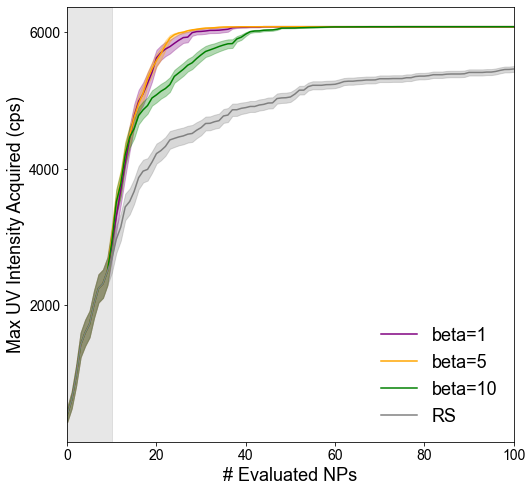

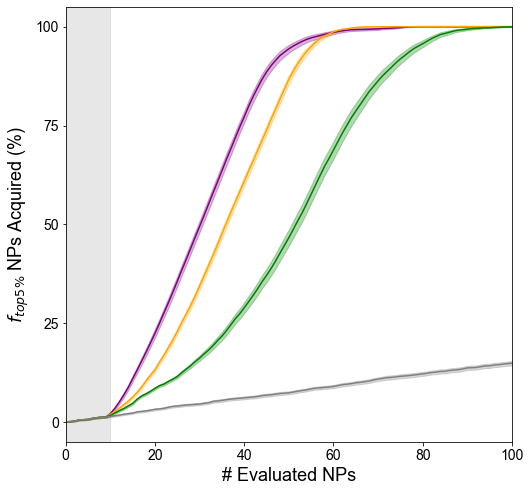

In [56]:
df0 = pickle.load( open( "../saved_data/new_100iters_10inits_100trials_logEmission_UCB_beta=1_init_included.pkl", "rb" ) )
df1 = pickle.load( open( "../saved_data/new_100iters_10inits_100trials_logEmission_UCB_beta=5_init_included.pkl", "rb" ) )
df2 = pickle.load( open( "../saved_data/new_100iters_10inits_100trials_logEmission_UCB_beta=10_init_included.pkl", "rb" ) )
df3 = pickle.load( open( "../saved_data/new_100iters_10inits_100trials_logEmission_RS_init_included.pkl", "rb" ) )
#df4 = pickle.load( open( "pool_based_tuning/log_result_10inits_10trials_beta=1e4.pkl", "rb" ) )

FontSize = 18
ticksize = 14

fig, ax1 = plt.subplots(figsize=(8,8))

x,y,stderr = get_max_stat(df0)
plt.plot(x,y,c='purple',label='beta=1')
plt.fill_between(x, y-stderr, y+stderr, color='purple',alpha=0.3)

x,y,stderr = get_max_stat(df1)
plt.plot(x,y,c='orange',label='beta=5')
plt.fill_between(x, y-stderr, y+stderr, color='orange',alpha=0.3)

x,y,stderr = get_max_stat(df2)
plt.plot(x,y,c='green',label='beta=10')
plt.fill_between(x, y-stderr, y+stderr, color='green',alpha=0.3)

x,y,stderr = get_max_stat(df3)
plt.plot(x,y,c='grey',label='RS')
plt.fill_between(x, y-stderr, y+stderr, color='grey',alpha=0.3)





plt.xlim([0,100])
# plt.axvspan(0, 10, color='grey', alpha=0.19)
plt.xlabel('# Evaluated NPs', fontsize = FontSize)
plt.ylabel('Max UV Intensity Acquired (cps)', fontsize = FontSize)
plt.legend(loc='lower right', fontsize = FontSize,frameon=False)
plt.locator_params(axis='y', nbins=4)
plt.xticks(fontsize=ticksize)
plt.yticks(fontsize=ticksize)
plt.axvspan(0, 10, color='grey', alpha=0.19)
plt.savefig('SI_pool_max_uv_log_UCB.pdf', bbox_inches = 'tight') 



#####
fig, ax1 = plt.subplots(figsize=(8,8))

x,y,stderr = get_top_stat(df0)
plt.plot(x,y,c='purple',label='beta=1')
plt.fill_between(x, y-stderr, y+stderr, color='purple',alpha=0.3)

x,y,stderr = get_top_stat(df1)
plt.plot(x,y,c='orange',label='beta=5')
plt.fill_between(x, y-stderr, y+stderr, color='orange',alpha=0.3)

x,y,stderr = get_top_stat(df2)
plt.plot(x,y,c='green',label='beta=10')
plt.fill_between(x, y-stderr, y+stderr, color='green',alpha=0.3)


x,y,stderr = get_top_stat(df3)
plt.plot(x,y,c='grey',label='Random Search')
plt.fill_between(x, y-stderr, y+stderr, color='grey',alpha=0.3)

plt.xlim([0,100])
# plt.axvspan(0, 10, color='grey', alpha=0.19)
plt.xlabel('# Evaluated NPs', fontsize = FontSize)
plt.ylabel('$f_{top5\%}$ NPs Acquired (%)', fontsize = FontSize)
#plt.legend(loc='lower right', fontsize = FontSize,frameon=False)
plt.locator_params(axis='y', nbins=5)
plt.xticks(fontsize=ticksize)
plt.yticks(fontsize=ticksize)
plt.axvspan(0, 10, color='grey', alpha=0.19)
plt.savefig('SI_pool_top_number_log_UCB.pdf',bbox_inches = 'tight') 